In [105]:
%load_ext autoreload
%autoreload 2

from MyOptimizGrid import OptimizGrid 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


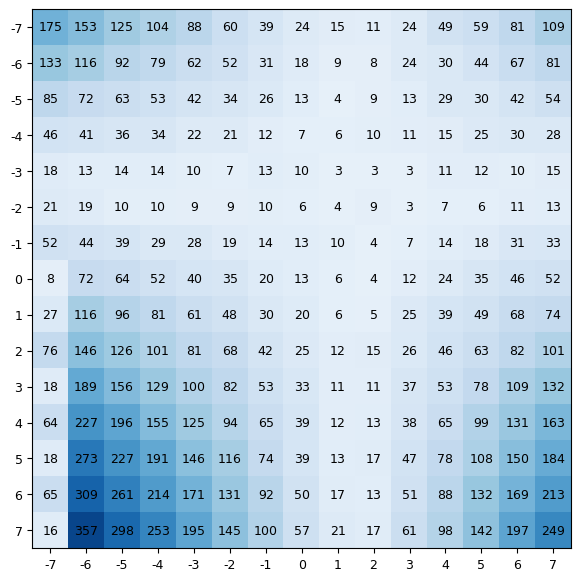

In [106]:
txt = """
    175 153 125 104 88 60 39 24 15 11 24 49 59 81 109
    133 116 92 79 62 52 31 18 9 8 24 30 44 67 81
    85 72 63 53 42 34 26 13 4 9 13 29 30 42 54
    46 41 36 34 22 21 12 7 6 10 11 15 25 30 28
    18 13 14 14 10 7 13 10 3 3 3 11 12 10 15
    21 19 10 10 9 9 10 6 4 9 3 7 6 11 13
    52 44 39 29 28 19 14 13 10 4 7 14 18 31 33
    8 72 64 52 40 35 20 13 6 4 12 24 35 46 52
    27 116 96 81 61 48 30 20 6 5 25 39 49 68 74
    76 146 126 101 81 68 42 25 12 15 26 46 63 82 101
    18 189 156 129 100 82 53 33 11 11 37 53 78 109 132
    64 227 196 155 125 94 65 39 12 13 38 65 99 131 163
    18 273 227 191 146 116 74 39 13 17 47 78 108 150 184
    65 309 261 214 171 131 92 50 17 13 51 88 132 169 213
    16 357 298 253 195 145 100 57 21 17 61 98 142 197 249
"""

optimiz = OptimizGrid()
optimiz.build_from_text(txt)
optimiz.allow_diagonal(False)
optimiz.set_index_names(
    x = np.arange(-7, 8),
    y = np.arange(-7, 8),
)

plt.rcParams['figure.figsize'] = (7,7)
optimiz.draw()

step | index    | name     | desc  | value
   0 |  14,  14 |   7,   7 | start |   249
   1 |  14,  13 |   7,   6 |  left |   197
   2 |  14,  12 |   7,   5 |  left |   142
   3 |  14,  11 |   7,   4 |  left |    98
   4 |  14,  10 |   7,   3 |  left |    61
   5 |  14,   9 |   7,   2 |  left |    17
   6 |  13,   9 |   6,   2 |    up |    13


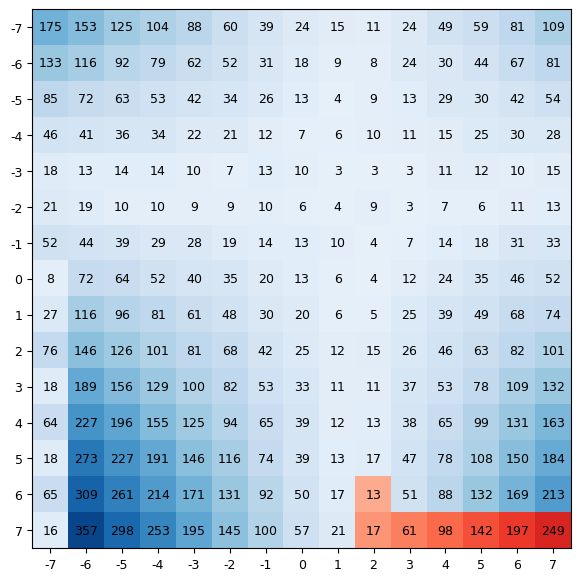

In [122]:
start = optimiz.name_to_index(7,7)
path = optimiz.local_search(start=start)
OptimizGrid.print_path(path)
    
plt.rcParams['figure.figsize'] = (7,7)
optimiz.draw(path=path)
    

step | index    | name     | desc  | value
   0 |   0,  14 |  -7,   7 | start |   109
   1 |   0,  13 |  -7,   6 |  left |    81
   2 |   0,  12 |  -7,   5 |  left |    59
   3 |   1,  12 |  -6,   5 |  down |    44
   4 |   1,  11 |  -6,   4 |  left |    30
   5 |   1,  10 |  -6,   3 |  left |    24
   6 |   1,   9 |  -6,   2 |  left |     8
   7 |   1,   8 |  -6,   1 |  left |     9
   8 |   2,   8 |  -5,   1 |  down |     4
   9 |   3,   8 |  -4,   1 |  down |     6
  10 |   4,   8 |  -3,   1 |  down |     3
  11 |   4,   9 |  -3,   2 | right |     3
  12 |   4,  10 |  -3,   3 | right |     3
  13 |   5,  10 |  -2,   3 |  down |     3


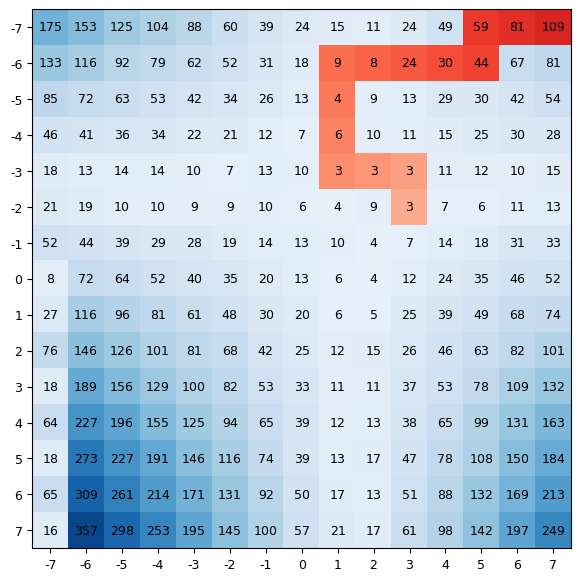

In [126]:
start = optimiz.name_to_index(-7,7)
path = optimiz.tabu_search(start=start, t=3, max_steps=14)
OptimizGrid.print_path(path)
    
plt.rcParams['figure.figsize'] = (7,7)
optimiz.draw(path=path)

path is empty


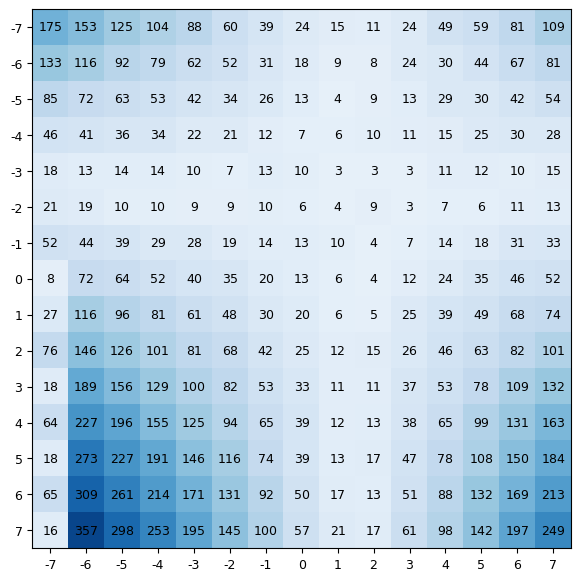

In [130]:
start = optimiz.name_to_index(-7,7)
path = optimiz.pilot_search(start=start)
OptimizGrid.print_path(path)
    
plt.rcParams['figure.figsize'] = (7,7)
optimiz.draw(path=path)